In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
df=pd.read_csv(url,names=['sepal_length','sepal_width','petal_length','petal_width','target'])

In [4]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
feature=['sepal_length','sepal_width','petal_length','petal_width']


In [6]:
X=df.loc[:,feature]  #X = df[:,0:4]
y=df.loc[:,'target'] # y =[:,4]


In [7]:
X=StandardScaler().fit_transform(X)
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [8]:
#Converting PCA excecution and projection to 2D
from sklearn.decomposition import PCA


In [9]:
pca=PCA(n_components=2)
pct=pca.fit_transform(X)# pct - model

principal_df=pd.DataFrame(pct,columns=['PC1','PC2'])

final_df=pd.concat([principal_df,df[['target']]],axis=1)
final_df

,PC1,PC2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


In [10]:
print('before pca\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(df[:5])
print('after pca\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(final_df[:5])

before pca
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
   sepal_length  sepal_width  petal_length  petal_width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
after pca
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
        PC1       PC2       target
0 -2.264542  0.505704  Iris-setosa
1 -2.086426 -0.655405  Iris-setosa
2 -2.367950 -0.318477  Iris-setosa
3 -2.304197 -0.575368  Iris-setosa
4 -2.388777  0.674767  Iris-setosa


In [11]:
principal_df

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


array([0.72770452, 0.23030523])

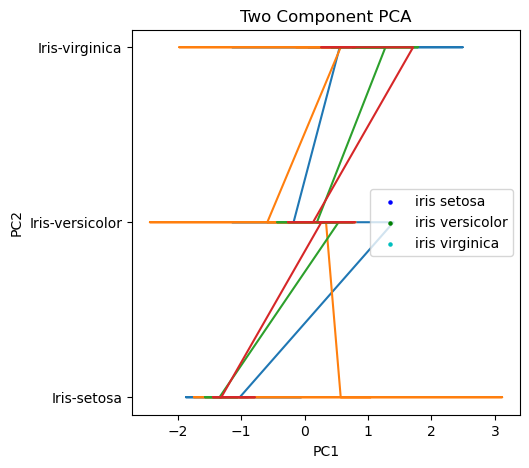

In [12]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Two Component PCA')

targets=['iris setosa','iris versicolor','iris virginica']
colors=['b','g','c']

for target,color in zip(targets,colors):
    index=final_df['target']==target
    ax.scatter(final_df.loc[index,'PC1'],final_df.loc[index,'PC2'],c=color,s=5)
    ax.legend(targets)
    #ax.grid()
plt.plot(X,y)

pca.explained_variance_ratio_

In [13]:
# final_df = pca reduced dimensionality target
# df['target'] = original target